In [1]:
## 1.n_estimators
##  比较决策树和随机森林

In [1]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
import pandas as pd

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
wine = load_wine()
wine.data

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [4]:
##   sklearn建模的基本流程
#实例化
#训练集带入实例化后的模型进行训练，使用的接口是fit
#使用其他接口将我们的测试集导入到模型，获取我们我们想要的结果（score，Y_pred）

In [3]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

In [4]:
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)
clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

In [6]:
print("决策树的概率：{}".format(score_c),"随机森林的概率:{}".format(score_r))

决策树的概率：0.9259259259259259 随机森林的概率:0.9444444444444444


In [7]:
y_predict = clf.predict(Xtest)

In [8]:
y_predict == Ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True], dtype=bool)

In [25]:
##  随机森林和决策树在一组交叉验证下的效果对比
#交叉验证：是数据集划分为n份依次取每个做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法

<IPython.core.display.Javascript object>


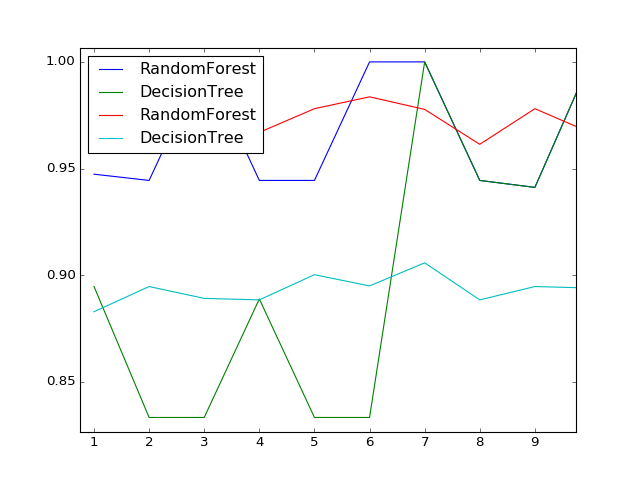

In [9]:
%matplotlib notebook
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)   #1、划分训练集和测试集 2、fit  3、score

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10)

plt.plot(range(1,11), rfc_s, label = "RandomForest")
plt.plot(range(1,11), clf_s, label = "DecisionTree")
plt.legend(loc = 'upper left')

In [11]:
clf_s

array([ 0.89473684,  0.83333333,  0.83333333,  0.88888889,  0.83333333,
        0.83333333,  1.        ,  0.94444444,  0.94117647,  1.        ])

<IPython.core.display.Javascript object>


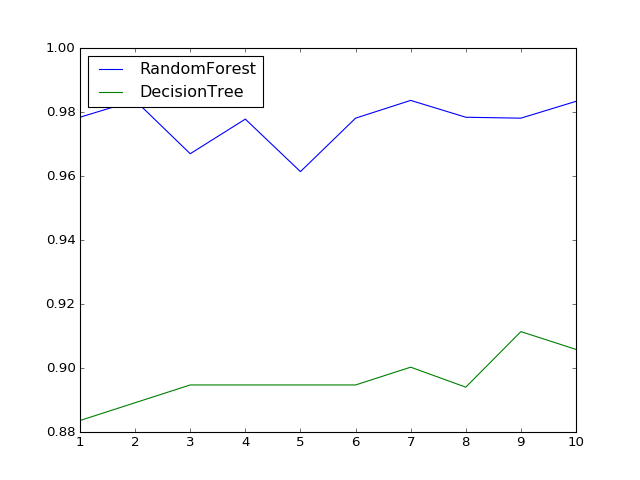

In [13]:
##  随机森林和决策树在十组交叉验证下的效果对比

rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11), rfc_l, label = "RandomForest")
plt.plot(range(1,11), clf_l, label = "DecisionTree")
plt.legend(loc = 'upper left')
plt.show()



0.988888888889
_______________
28


<IPython.core.display.Javascript object>


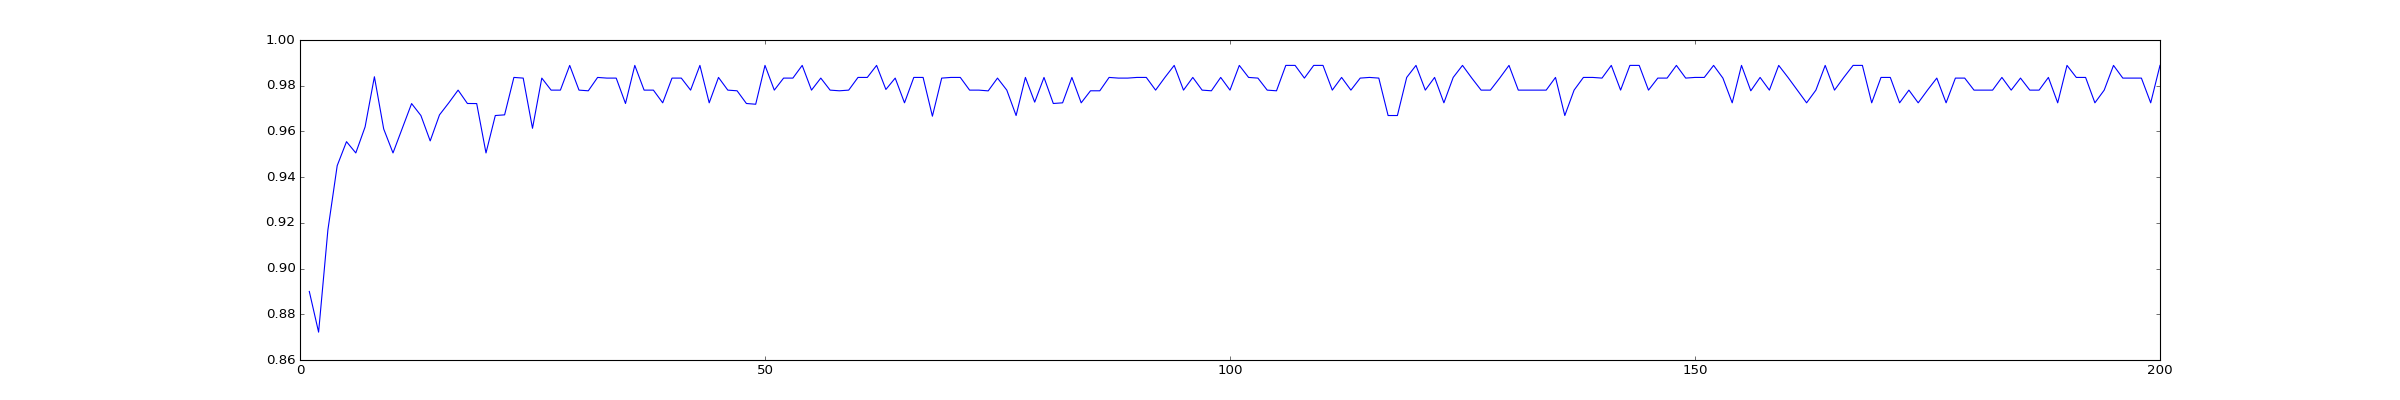

In [14]:
##  n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1,n_jobs = -1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    superpa.append(rfc_s)
print(max(superpa))
print("_______________")
print(superpa.index(max(superpa)))
plt.figure(figsize=[30,5])
plt.plot(range(1,201),superpa)    

#list.index(object)  >>>对象object在list中的索引

In [16]:
rfc= RandomForestClassifier(n_estimators=20,random_state=2)
rfc= rfc.fit(Xtrain, Ytrain)

In [22]:
rfc.feature_importances_

array([ 0.13084103,  0.01083964,  0.00828353,  0.05475809,  0.0303404 ,
        0.04691401,  0.10040854,  0.0175044 ,  0.03020748,  0.12983479,
        0.09806227,  0.15202595,  0.18997987])